<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Project-Submission" data-toc-modified-id="Final-Project-Submission-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Final Project Submission</a></span></li><li><span><a href="#Import-necessary-libraries" data-toc-modified-id="Import-necessary-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import necessary libraries</a></span></li><li><span><a href="#Dataset-Prep" data-toc-modified-id="Dataset-Prep-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataset Prep</a></span><ul class="toc-item"><li><span><a href="#Checking-for-invalid-images" data-toc-modified-id="Checking-for-invalid-images-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Checking for invalid images</a></span></li></ul></li><li><span><a href="#Execute-code-below" data-toc-modified-id="Execute-code-below-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Execute code below</a></span></li><li><span><a href="#Read-in-Data" data-toc-modified-id="Read-in-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Read in Data</a></span><ul class="toc-item"><li><span><a href="#What-is-the-distribution-across-the-categories?" data-toc-modified-id="What-is-the-distribution-across-the-categories?-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>What is the distribution across the categories?</a></span></li><li><span><a href="#Calculate-number-of-images-in-train,-test-and-validation" data-toc-modified-id="Calculate-number-of-images-in-train,-test-and-validation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Calculate number of images in train, test and validation</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Create-keras-model" data-toc-modified-id="Create-keras-model-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Create keras model</a></span></li><li><span><a href="#Save-model" data-toc-modified-id="Save-model-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Save model</a></span></li><li><span><a href="#Visualize-training-history" data-toc-modified-id="Visualize-training-history-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Visualize training history</a></span></li><li><span><a href="#Evalute-test-data" data-toc-modified-id="Evalute-test-data-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Evalute test data</a></span></li></ul></li><li><span><a href="#Pre-Trained-Network-Part-1" data-toc-modified-id="Pre-Trained-Network-Part-1-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Pre-Trained Network Part 1</a></span><ul class="toc-item"><li><span><a href="#Fine-tuning-the-network" data-toc-modified-id="Fine-tuning-the-network-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Fine-tuning the network</a></span></li><li><span><a href="#Save-model" data-toc-modified-id="Save-model-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Save model</a></span></li><li><span><a href="#Visualize-training-history" data-toc-modified-id="Visualize-training-history-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Visualize training history</a></span></li><li><span><a href="#Evaluate-test-data" data-toc-modified-id="Evaluate-test-data-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Evaluate test data</a></span></li></ul></li><li><span><a href="#Pre-Trained-Network-Part-2-(Experimental)" data-toc-modified-id="Pre-Trained-Network-Part-2-(Experimental)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Pre-Trained Network Part 2 (Experimental)</a></span><ul class="toc-item"><li><span><a href="#Visualize-training-history" data-toc-modified-id="Visualize-training-history-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Visualize training history</a></span></li><li><span><a href="#Evaluate-test-data" data-toc-modified-id="Evaluate-test-data-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Evaluate test data</a></span></li><li><span><a href="#TODO" data-toc-modified-id="TODO-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>TODO</a></span></li></ul></li><li><span><a href="#Multi-label-Classification" data-toc-modified-id="Multi-label-Classification-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Multi-label Classification</a></span><ul class="toc-item"><li><span><a href="#TODO" data-toc-modified-id="TODO-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>TODO</a></span></li></ul></li></ul></div>

# Final Project Submission

Please fill out:
* Student name: **Stephan Osterburg**
* Student pace: **Full Time**
* Scheduled project review date/time: **2/8/2019**
* Instructor name: **Rafael Carrasco**
* Blog post URL: https://stephanosterburg.github.io/deep_learning_art_images/


# Import necessary libraries

In [1]:
import sys, os, shutil

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# from tqdm import tqdm
from itertools import chain

# Printing models in ipynb
from PIL import Image
from scipy import ndimage
from keras.utils.vis_utils import model_to_dot, plot_model
from IPython.display import SVG

from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize

import tensorflow as tf

import keras
from keras import regularizers, optimizers
from keras.applications import VGG16, VGG19
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img, img_to_array
from keras.preprocessing.image import load_img
from keras import backend as K


import warnings
warnings.filterwarnings('ignore', category=Warning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
# OMP: Error #15: Initializing libiomp5.dylib, but found libiomp5.dylib already initialized.
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

np.random.seed(42)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Dataset Prep

The dataset contains two directories which can be compined. Also, there are some bad images (invalid) which we need to delete. While we are at it, we will re-orginize the directory structure a little bit and rename the images. This is just for us and not necessarily needed for keras. 

This is a one off and can be remove from the notebook. For the time being I will leave it in here for documentation. But shouldn't be executed again, otherwise we will just see errors.

Looks like that we have duplicates in dataset and musemart.

## Checking for invalid images

Assumging that we have in train, test and validation bad images, we shall remove them.

---

# Execute code below

---

# Read in Data

Let's have a look at some of the images

In [2]:
img_width, img_height = 150, 150

categories = ['drawings', 'engraving', 'iconography' ,'painting' ,'sculpture']

train_path = 'dataset/train/'
valid_path = 'dataset/validation/'
test_path  = 'dataset/test/'

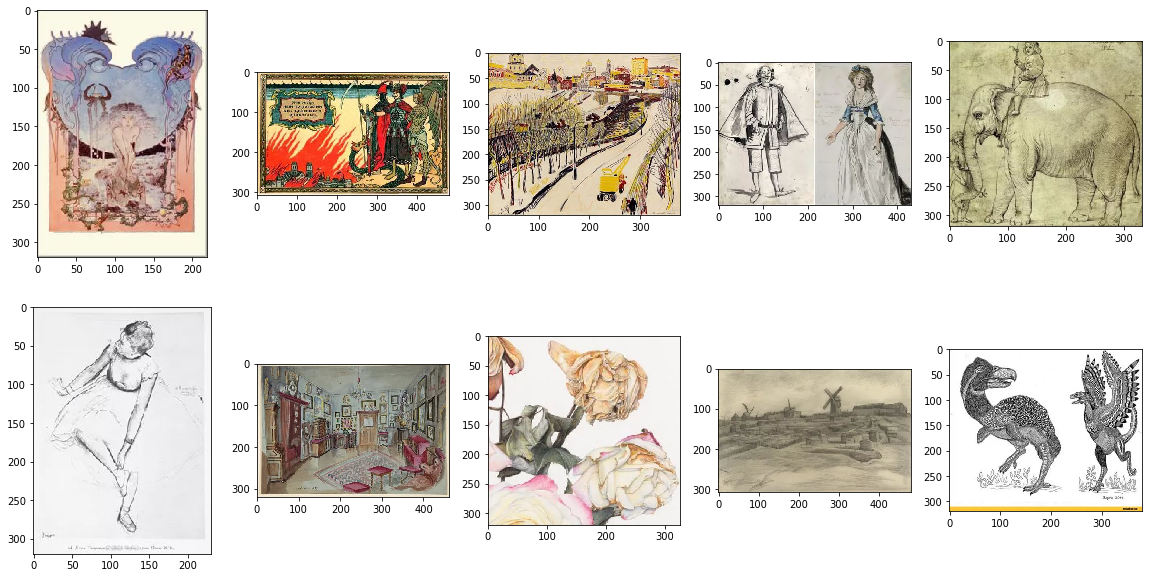

In [3]:
def show_images_for_art(art_type="drawings", num_pics=10):
    assert art_type in categories
    
    pic_dir = os.path.join(train_path, art_type)
    pic_files = [os.path.join(pic_dir, filename) for filename in os.listdir(pic_dir)]

    ncols = 5
    nrows = (num_pics - 1) // ncols + 1
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4))
    
    fig.set_size_inches((20, nrows * 5))
    ax = ax.ravel()
    
    for pic, ax in zip(pic_files[:num_pics], ax):
        img = imread(pic)
        ax.imshow(img, resample=True)
    
    plt.show();
    
show_images_for_art(art_type="drawings")

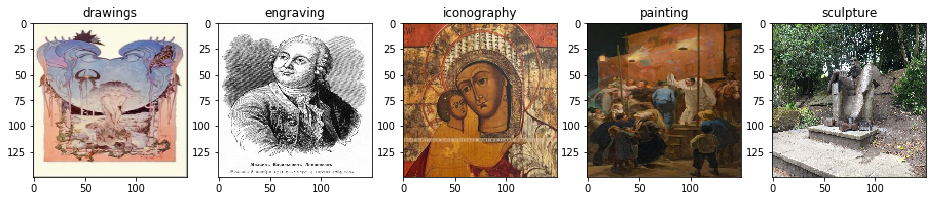

In [4]:
# Just have a look at the categories itself, one image shall be ok

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(16, 4))

for i, cat in enumerate(categories):
    cat_path = os.path.join(train_path, cat)
    img_name = os.listdir(cat_path)[0]
    
    img = imread(os.path.join(cat_path, img_name))
    img = resize(img, (img_width, img_height, 3), mode='reflect')
    
    ax[i].imshow(img, resample=True)
    ax[i].set_title(cat)
    
plt.show();

## What is the distribution across the categories?

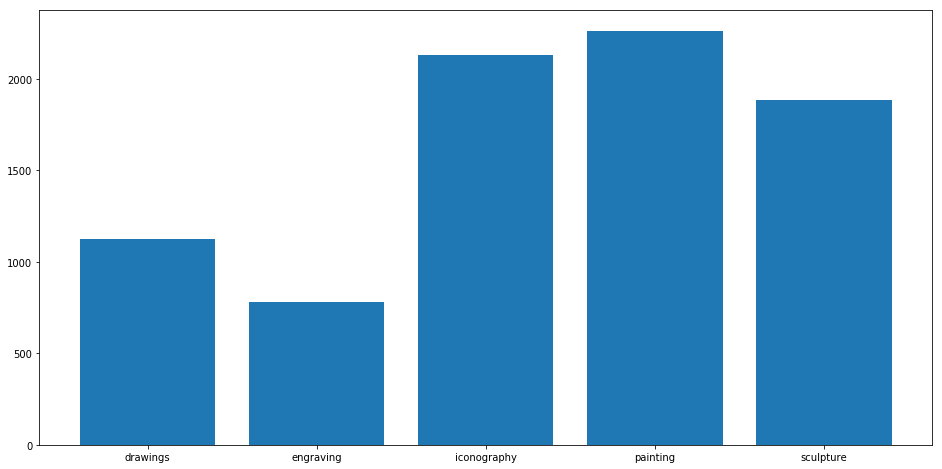

In [5]:
n_imgs = []
for cat in categories:
    files = os.listdir(os.path.join(train_path, cat))
    n_imgs += [len(files)]

plt.figure(figsize=(16, 8))
plt.bar([_ for _ in range(5)], n_imgs, tick_label=categories)
plt.show();

## Calculate number of images in train, test and validation

In [6]:
num_train_sample = 0
for i, cat in enumerate(categories):
    cat_path = os.path.join(train_path, cat)
    num_train_sample += len(os.listdir(cat_path))
    
print('Total number of training samples: {}'.format(num_train_sample))

Total number of training samples: 8188


In [7]:
num_test_sample = 0
for i, cat in enumerate(categories):
    cat_path = os.path.join(test_path, cat)
    num_test_sample += len(os.listdir(cat_path))
    
print('Total number of test samples: {}'.format(num_test_sample))

Total number of test samples: 818


In [8]:
num_validation_sample = 0
for i, cat in enumerate(categories):
    cat_path = os.path.join(valid_path, cat)
    num_validation_sample += len(os.listdir(cat_path))
    
print('Total number of validation samples: {}'.format(num_validation_sample))

Total number of validation samples: 1107


# Preprocessing

Let's prepare the data using `flow_from_directory` to generate batches of image data (and labels) and resize all images to 128x128.

**Question**: should we preprocess the images for the pre-trained VGG network?

In [9]:
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

In [10]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

valid_generator = datagen.flow_from_directory(
        valid_path,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

test_generator = datagen.flow_from_directory(
        test_path,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

Found 8188 images belonging to 5 classes.
Found 1107 images belonging to 5 classes.
Found 818 images belonging to 5 classes.


## Create keras model

In [11]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
%%time

train_result = model.fit_generator(
            train_generator,
            steps_per_epoch=num_train_sample // batch_size,
            epochs=epochs,
            validation_data=valid_generator,
            validation_steps=num_validation_sample // batch_size,
            use_multiprocessing=True)

Epoch 1/50
511/511 [==============================] - 83s 163ms/step - loss: 0.7692 - acc: 0.7218 - val_loss: 0.7089 - val_acc: 0.7428
Epoch 2/50
511/511 [==============================] - 79s 154ms/step - loss: 0.6652 - acc: 0.7632 - val_loss: 0.6020 - val_acc: 0.7929
Epoch 3/50
511/511 [==============================] - 78s 153ms/step - loss: 0.6015 - acc: 0.7850 - val_loss: 0.5486 - val_acc: 0.7901
Epoch 4/50
511/511 [==============================] - 78s 153ms/step - loss: 0.5639 - acc: 0.7973 - val_loss: 0.4950 - val_acc: 0.8093
Epoch 5/50
511/511 [==============================] - 78s 153ms/step - loss: 0.5186 - acc: 0.8147 - val_loss: 0.6191 - val_acc: 0.7809
Epoch 6/50
511/511 [==============================] - 78s 153ms/step - loss: 0.4967 - acc: 0.8207 - val_loss: 0.5005 - val_acc: 0.8167
Epoch 7/50
511/511 [==============================] - 77s 152ms/step - loss: 0.4676 - acc: 0.8364 - val_loss: 0.6293 - val_acc: 0.7919
Epoch 8/50
511/511 [==============================] - 7

## Save model

In [16]:
model.save('CNN_base_run1.h5')

## Visualize training history

Let's display Loss and Accuravy

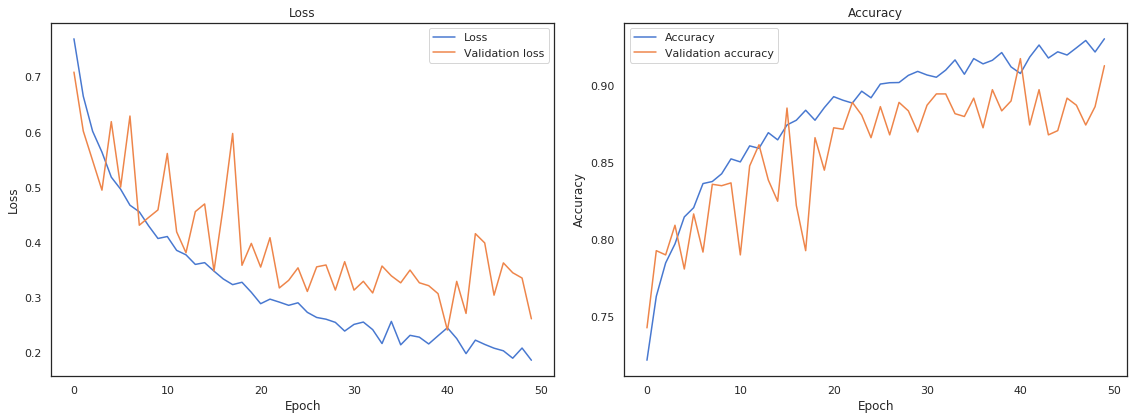

In [17]:
sns.set(style="white", palette="muted", color_codes=True)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

ax[0].plot(train_result.history['loss'], label="Loss")
ax[0].plot(train_result.history['val_loss'], label="Validation loss")
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_result.history['acc'], label="Accuracy")
ax[1].plot(train_result.history['val_acc'], label="Validation accuracy")
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.tight_layout()

plt.show();

## Evalute test data

In [18]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=32)
y_hat_test = model.predict_generator(test_generator, steps=32)

print('Generated {} predictions'.format(len(y_hat_test)))
print('Test accuracy: {:.2f}%'.format(test_acc * 100))

Generated 512 predictions
Test accuracy: 95.90%


# Pre-Trained Network Part 1

We can leverage a pre-trained network like the VGG19 architecture, which is pre-trained on the ImageNet dataset. Even so the ImageNet dataset contains only "cats" and "dogs" it can be used for a more generalized problem like the Art Images.

Here we will only instantiate the convolutional part of the model, everything up to the fully-connected layers. In our case we will freeze the layers of the VGG19 model. And only fine-tune the added layers.

To further improve the model we could make the last five nodes trainable. But that is for another time.

In [19]:
# Load the VGG19 network
vgg_model = VGG19(include_top=False, weights='imagenet', input_shape=input_shape)
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

## Fine-tuning the network 

In [20]:
model = Sequential([
    vgg_model,
    Flatten(),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

vgg_model.trainable = False

# Check what layers are trainable
for layer in model.layers:
    print(layer.name, layer.trainable)
    
# model.summary()

vgg19 False
flatten_2 True
dense_4 True
dense_5 True
dense_6 True
dense_7 True
dense_8 True


In [22]:
%%time

# Compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the Model
train_result = model.fit_generator(
            train_generator,
            steps_per_epoch=num_train_sample // batch_size,
            epochs=epochs,
            validation_data=valid_generator,
            validation_steps=num_validation_sample // batch_size,
            use_multiprocessing=True)

Epoch 1/50
511/511 [==============================] - 80s 157ms/step - loss: 0.5665 - acc: 0.7886 - val_loss: 0.4380 - val_acc: 0.8306
Epoch 2/50
511/511 [==============================] - 79s 154ms/step - loss: 0.3952 - acc: 0.8548 - val_loss: 0.3893 - val_acc: 0.8497
Epoch 3/50
511/511 [==============================] - 79s 155ms/step - loss: 0.3607 - acc: 0.8660 - val_loss: 0.3312 - val_acc: 0.8662
Epoch 4/50
511/511 [==============================] - 81s 158ms/step - loss: 0.3254 - acc: 0.8809 - val_loss: 0.3113 - val_acc: 0.8808
Epoch 5/50
511/511 [==============================] - 79s 155ms/step - loss: 0.2958 - acc: 0.8881 - val_loss: 0.3110 - val_acc: 0.8845
Epoch 6/50
511/511 [==============================] - 78s 153ms/step - loss: 0.2818 - acc: 0.8964 - val_loss: 0.3011 - val_acc: 0.8900
Epoch 7/50
511/511 [==============================] - 79s 154ms/step - loss: 0.2626 - acc: 0.9045 - val_loss: 0.2671 - val_acc: 0.8918
Epoch 8/50
511/511 [==============================] - 7

## Save model

In [23]:
model.save('VGG19_Feature_Engineered.h5')

## Visualize training history

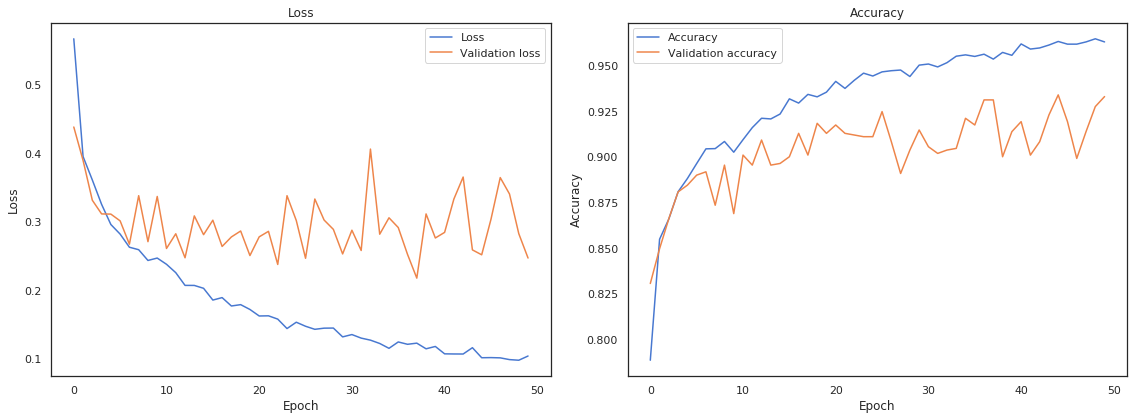

In [24]:
sns.set(style="white", palette="muted", color_codes=True)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

ax[0].plot(train_result.history['loss'], label="Loss")
ax[0].plot(train_result.history['val_loss'], label="Validation loss")
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_result.history['acc'], label="Accuracy")
ax[1].plot(train_result.history['val_acc'], label="Validation accuracy")
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.tight_layout()

plt.show();

## Evaluate test data

In [25]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=32, use_multiprocessing=True)
y_hat_test = model.predict_generator(test_generator, steps=32, use_multiprocessing=True)

print('Generated {} predictions'.format(len(y_hat_test)))
print('Test accuracy: {:.2f}%'.format(test_acc * 100))

Generated 512 predictions
Test accuracy: 98.44%


# Pre-Trained Network Part 2 (Experimental)

As we did above we will use the pre-trained VGG19 network. Only this time we will run the model on our training and validation data once and record the output in two numpy arrays. Then we will train a small fully-connected model on top of the stored features.

The reason why we are storing the features offline rather than adding our fully-connected model directly on top of a frozen convolutional base and running the whole thing, is computational effiency. Running VGG16 is expensive, especially if you're working on CPU, and we want to only do it once. 

Note that this prevents us from using data augmentation.

In [26]:
# Load the VGG19 network
vgg_model = VGG19(include_top=False, weights='imagenet', input_shape=input_shape)
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

We will set the `class_mode` to `None`. The generator will only yield batches of image data, which is useful to use with `model.predict_generator()`. This means that the generator will only have batches of data and no labels.

In [27]:
%%time
datagen = ImageDataGenerator(rescale=1. / 255)

generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

bottleneck_features_train = vgg_model.predict_generator(
    generator, 500, use_multiprocessing=True)

# Save the output as a numpy array
np.save(open('bottleneck_features_train.npy', 'wb'),
        bottleneck_features_train)

Found 8188 images belonging to 5 classes.
CPU times: user 18.5 s, sys: 16.5 s, total: 35.1 s
Wall time: 39.9 s


In [28]:
%%time
generator = datagen.flow_from_directory(
    valid_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

bottleneck_features_validation = vgg_model.predict_generator(
    generator, 60, use_multiprocessing=True, verbose=1)

# Save the output as a numpy array
np.save(open('bottleneck_features_validation.npy', 'wb'), 
        bottleneck_features_validation)

Found 1107 images belonging to 5 classes.
60/60 [==============================] - 4s 75ms/step
CPU times: user 2.37 s, sys: 2.13 s, total: 4.5 s
Wall time: 5.01 s


In [29]:
bottleneck_features_train.shape, bottleneck_features_validation.shape

((8000, 4, 4, 512), (960, 4, 4, 512))

In [37]:
train_data = np.load(open('bottleneck_features_train.npy', 'rb'))
# train_labels = np.array([0] * 4000 + [1] * 4000)
a = np.zeros(shape=(8000, 3))
b = np.ones(shape=(8000, 2))
train_labels = np.concatenate((a, b), axis=1)

validation_data = np.load(open('bottleneck_features_validation.npy', 'rb'))
# validation_labels = np.array([0] * 480 + [1] * 480)
a = np.zeros(shape=(960, 3))
b = np.ones(shape=(960, 2))
validation_labels = np.concatenate((a, b), axis=1)

In [38]:
train_data.shape, train_labels.shape

((8000, 4, 4, 512), (8000, 5))

In [39]:
model = Sequential([
    Flatten(input_shape=train_data.shape[1:]),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')
])

In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 1285      
Total params: 2,098,693
Trainable params: 2,098,693
Non-trainable params: 0
_________________________________________________________________


In [42]:
%%time
train_result = model.fit(train_data, train_labels,
                         epochs=epochs,
                         batch_size=batch_size,
                         validation_data=(validation_data, validation_labels)
                        )

Train on 8000 samples, validate on 960 samples
Epoch 1/50
8000/8000 [==============================] - 3s 371us/step - loss: 1.4486 - acc: 0.5055 - val_loss: 1.3863 - val_acc: 0.3792
Epoch 2/50
8000/8000 [==============================] - 3s 334us/step - loss: 1.3864 - acc: 0.5192 - val_loss: 1.3863 - val_acc: 0.9792
Epoch 3/50
8000/8000 [==============================] - 3s 331us/step - loss: 1.3863 - acc: 0.5360 - val_loss: 1.3863 - val_acc: 0.0094
Epoch 4/50
8000/8000 [==============================] - 3s 333us/step - loss: 1.3863 - acc: 0.4983 - val_loss: 1.3863 - val_acc: 0.9833
Epoch 5/50
8000/8000 [==============================] - 3s 329us/step - loss: 1.3863 - acc: 0.4846 - val_loss: 1.3863 - val_acc: 0.9854
Epoch 6/50
8000/8000 [==============================] - 3s 334us/step - loss: 1.3863 - acc: 0.5189 - val_loss: 1.3863 - val_acc: 0.0271
Epoch 7/50
8000/8000 [==============================] - 3s 334us/step - loss: 1.3863 - acc: 0.4849 - val_loss: 1.3863 - val_acc: 0.0042
E

In [43]:
model.save_weights('bottleneck_fc_model.h5')

## Visualize training history

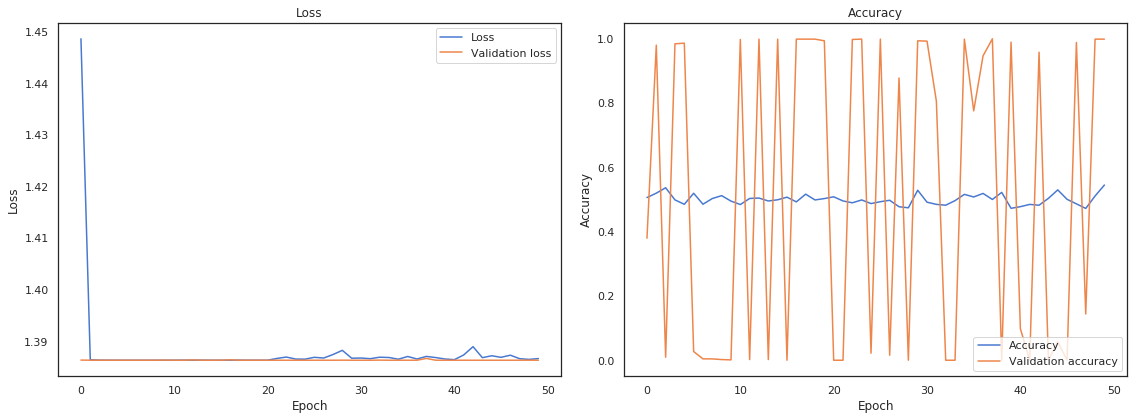

In [44]:
sns.set(style="white", palette="muted", color_codes=True)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

ax[0].plot(train_result.history['loss'], label="Loss")
ax[0].plot(train_result.history['val_loss'], label="Validation loss")
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_result.history['acc'], label="Accuracy")
ax[1].plot(train_result.history['val_acc'], label="Validation accuracy")
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.tight_layout()

plt.show();

## Evaluate test data

## TODO

* Is the shape for the created label arrays correct? Doesn't look like it. Investigate.
* Evaluate thoughts errors.

# Multi-label Classification

Can we create a multi-classification for images with multiple outputs?

First we will create a simpler model first. 

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', 
           input_shape=(100,100,3), 
           activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Dropout(0.25),
    Conv2D(64, (3, 3), padding='same', 
           activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='sigmoid')
])

model.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss="binary_crossentropy",metrics=["accuracy"])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 98, 98, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 49, 49, 64)        18496     
__________

In [11]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

Epoch 1/10
382/511 [=====================>........] - ETA: 17s - loss: 0.3478 - acc: 0.8543

/usr/local/lib/python3.5/dist-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


483/511 [===========================>..] - ETA: 3s - loss: 0.3329 - acc: 0.8608

/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6029312 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1311848 bytes but only got 785. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 8. 
  warnings.warn(str(msg))


511/511 [==============================] - 73s 143ms/step - loss: 0.3283 - acc: 0.8630 - val_loss: 0.2956 - val_acc: 0.8775
Epoch 2/10
511/511 [==============================] - 55s 108ms/step - loss: 0.2455 - acc: 0.9018 - val_loss: 0.2374 - val_acc: 0.9030
Epoch 3/10
511/511 [==============================] - 55s 107ms/step - loss: 0.2219 - acc: 0.9128 - val_loss: 0.2756 - val_acc: 0.8830
Epoch 4/10
511/511 [==============================] - 57s 111ms/step - loss: 0.2056 - acc: 0.9193 - val_loss: 0.2180 - val_acc: 0.9111
Epoch 5/10
511/511 [==============================] - 54s 106ms/step - loss: 0.1972 - acc: 0.9226 - val_loss: 0.2107 - val_acc: 0.9118
Epoch 6/10
511/511 [==============================] - 54s 105ms/step - loss: 0.1898 - acc: 0.9251 - val_loss: 0.2233 - val_acc: 0.9021
Epoch 7/10
511/511 [==============================] - 53s 103ms/step - loss: 0.1812 - acc: 0.9283 - val_loss: 0.2053 - val_acc: 0.9168
Epoch 8/10
511/511 [==============================] - 54s 105ms/st

In [12]:
test_generator.reset()
pred = model.predict_generator(test_generator, steps=STEP_SIZE_TEST, verbose=1)

51/51 [==============================] - 4s 84ms/step


We will use multiple outputs instead of a single Dense layer. Because Keras doesn't support multiple outputs we need to create a wrapper first to return target label array.

In [13]:
input_ = Input(shape = (100, 100, 3))
x = Conv2D(32, (3, 3), padding='same', activation='relu')(input_)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.25)(x)
x = Conv2D(64, (3, 3), padding = 'same', activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output1 = Dense(1, activation = 'sigmoid')(x)
output2 = Dense(1, activation = 'sigmoid')(x)
output3 = Dense(1, activation = 'sigmoid')(x)
output4 = Dense(1, activation = 'sigmoid')(x)
output5 = Dense(1, activation = 'sigmoid')(x)

model = Model(input_,[output1, output2, output3, output4, output5])

model.compile(optimizers.rmsprop(lr = 0.0001, decay = 1e-6),
              loss = ["binary_crossentropy", "binary_crossentropy",
                      "binary_crossentropy", "binary_crossentropy",
                      "binary_crossentropy"], metrics=["accuracy"])

In [14]:
def generator_wrapper(generator):
    for batch_x, batch_y in generator:
        yield (batch_x, [batch_y[:,i] for i in range(5)])

In [15]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

model.fit_generator(generator=generator_wrapper(train_generator),
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=generator_wrapper(valid_generator),
                    validation_steps=STEP_SIZE_VALID,
                    epochs=1,verbose=1)

Epoch 1/1
312/511 [=================>............] - ETA: 20s - loss: 1.9517 - dense_6_loss: 0.3701 - dense_7_loss: 0.2796 - dense_8_loss: 0.4258 - dense_9_loss: 0.3991 - dense_10_loss: 0.4770 - dense_6_acc: 0.8624 - dense_7_acc: 0.9014 - dense_8_acc: 0.8127 - dense_9_acc: 0.8159 - dense_10_acc: 0.7690

/usr/local/lib/python3.5/dist-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


471/511 [==========================>...] - ETA: 4s - loss: 1.7841 - dense_6_loss: 0.3550 - dense_7_loss: 0.2584 - dense_8_loss: 0.3727 - dense_9_loss: 0.3536 - dense_10_loss: 0.4444 - dense_6_acc: 0.8623 - dense_7_acc: 0.9058 - dense_8_acc: 0.8368 - dense_9_acc: 0.8459 - dense_10_acc: 0.7890

/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6029312 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1311848 bytes but only got 785. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 8. 
  warnings.warn(str(msg))


511/511 [==============================] - 57s 112ms/step - loss: 1.7608 - dense_6_loss: 0.3536 - dense_7_loss: 0.2544 - dense_8_loss: 0.3668 - dense_9_loss: 0.3464 - dense_10_loss: 0.4395 - dense_6_acc: 0.8622 - dense_7_acc: 0.9062 - dense_8_acc: 0.8397 - dense_9_acc: 0.8499 - dense_10_acc: 0.7933 - val_loss: 1.6255 - val_dense_6_loss: 0.3379 - val_dense_7_loss: 0.3616 - val_dense_8_loss: 0.2891 - val_dense_9_loss: 0.2526 - val_dense_10_loss: 0.3843 - val_dense_6_acc: 0.8714 - val_dense_7_acc: 0.8089 - val_dense_8_acc: 0.9013 - val_dense_9_acc: 0.9130 - val_dense_10_acc: 0.8098


In [16]:
test_generator.reset()

y_hat_test = model.predict_generator(test_generator, steps=STEP_SIZE_TEST, verbose=1)
print('Generated {} predictions'.format(len(y_hat_test)))

51/51 [==============================] - 3s 65ms/step
Generated 5 predictions


## TODO

* figure out how to evaluate the model for its accuracy.

In [17]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=STEP_SIZE_TEST, verbose=1)
print('Test accuracy: {:.2f}%'.format(test_acc * 100))

ValueError: Error when checking model target: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 5 array(s), but instead got the following list of 1 arrays: [array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1...